# About This Notebook

  Hey there, and a warm welcome to my EDA journey! 🚀 This notebook is a gateway to the fascinating world of data, curated and published on GitHub. I'm thrilled to guide you through the initial steps of crafting your own insightful notebooks and diving into the world of code. Every step is thoughtfully commented to make your journey smooth and enjoyable. Don't fret if things seem a bit complex at first - the code is simpler than you think, and I'm here to ensure you're on the right track! Let's embark on this exciting data adventure together. 🌟

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [3]:
air_quality = pd.read_csv('/content/world_air_quality_with_locations.csv.zip', index_col=0)
air_quality.sample(2)

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label,Lat,Long
7432,CN,NaN,黄埔科学城,"23.1716, 113.42560000000002",NO2,ChinaAQIData,µg/m³,59.0,2021-08-09T15:00:00+04:00,China,23.171600,113.425600
4285,IN,NaN,"BWSSB Kadabesanahalli, Bengaluru - KSPCB","12.93890556, 77.69727222",CO,CPCB,µg/m³,840.0,2018-02-22T07:00:00+04:00,India,12.938906,77.697272


> Let's dive into the CSV and discover the hidden treasures within! 📊 First things first, we'll unveil the data types, tweaking just one column (Last Updated) to ensure a smoother visualization. Then, brace yourself for the grand reveal of Nan values. Fear not, for they are but a few. 🕵️‍♂️ Particularly, our dear 'City' column plays a bit coy with Nan values, but I highly recommend focusing on the 'Location' column to unlock the visual wonders of GEO data. Let's unravel the story this data holds! 🌍✨

In [4]:
# Checking Nan Value
air_quality.isna().sum()

Country Code         0
City             16706
Location             2
Coordinates        219
Pollutant            0
Source Name          0
Unit                 0
Value                0
Last Updated         0
Country Label      115
Lat                219
Long               219
dtype: int64

In [5]:
# summary of the data
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43450 entries, 0 to 43449
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Code   43450 non-null  object 
 1   City           26744 non-null  object 
 2   Location       43448 non-null  object 
 3   Coordinates    43231 non-null  object 
 4   Pollutant      43450 non-null  object 
 5   Source Name    43450 non-null  object 
 6   Unit           43450 non-null  object 
 7   Value          43450 non-null  float64
 8   Last Updated   43450 non-null  object 
 9   Country Label  43335 non-null  object 
 10  Lat            43231 non-null  float64
 11  Long           43231 non-null  float64
dtypes: float64(3), object(9)
memory usage: 4.3+ MB


In [6]:
air_quality['Last Updated'] = pd.to_datetime(air_quality['Last Updated'])
air_quality['Last Updated'].info()

<class 'pandas.core.series.Series'>
Int64Index: 43450 entries, 0 to 43449
Series name: Last Updated
Non-Null Count  Dtype                                
--------------  -----                                
43450 non-null  datetime64[ns, pytz.FixedOffset(240)]
dtypes: datetime64[ns, pytz.FixedOffset(240)](1)
memory usage: 678.9 KB


<Axes: >

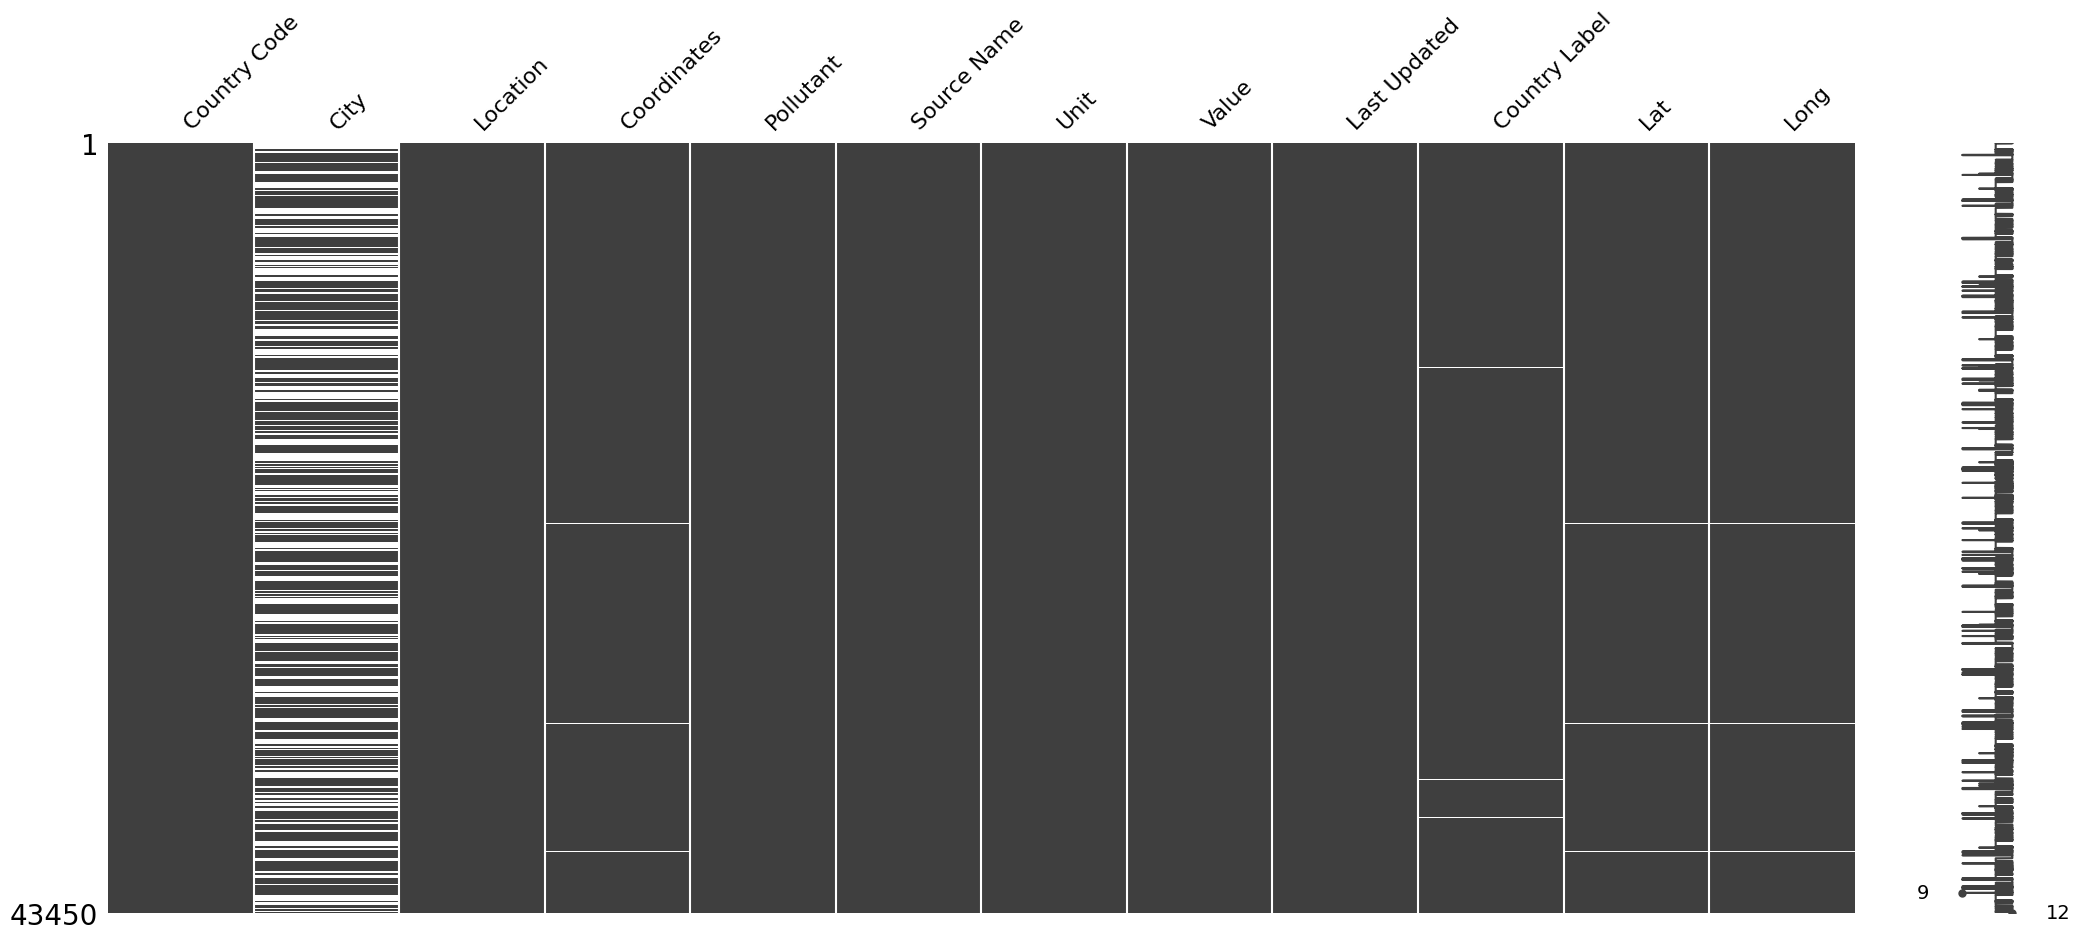

In [7]:
msno.matrix(air_quality)

# *Hold on tight, for we're about to venture into the world of vibrant visualizations - a quintessential element of my EDA notebooks! 🌈 Today is no different. We're set to explore the geographical gems, plotting the latitude and longitude of the calculation locations. Brace yourself for a simple yet enlightening scatterplot. 📈 My initial excitement was met with a twinge of disappointment as the metrics from Latam were fewer than anticipated. I was eager to witness their performance on this stage! However, fear not, for we've crafted an intriguing scatterplot that reveals more than you'd imagine. Let's unravel these visual tales! 🌏✨*

<Figure size 1000x800 with 0 Axes>

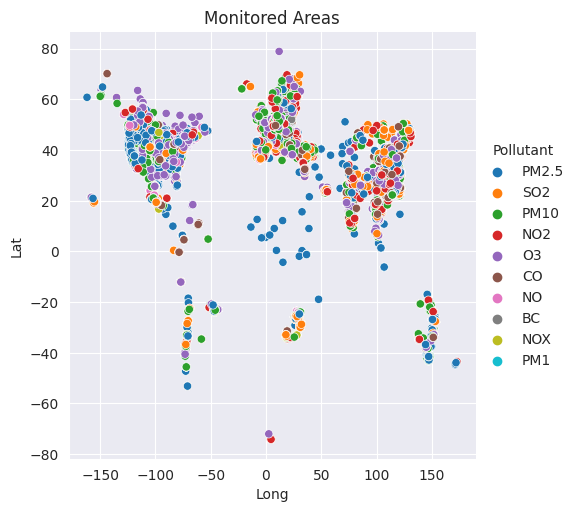

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.relplot(data = air_quality, x='Long', y='Lat', hue='Pollutant')
plt.title('Monitored Areas')
plt.show()

***The intrigue deepens! Despite the initial setback, my curiosity for Latam metrics persists. 🌎🔍 Setting my sights on India, a standout 'metriced' country in the region within this dataset, I dive in. Mirroring the earlier scatter plot, I take it up a notch by overlaying it on a country map using the mighty Geopandas - the champion of visualizing GEO data! 🗺️✨ There's something mysterious about that region, and I'm determined to unravel its secrets. Let's forge ahead on this visual expedition! 🚀***

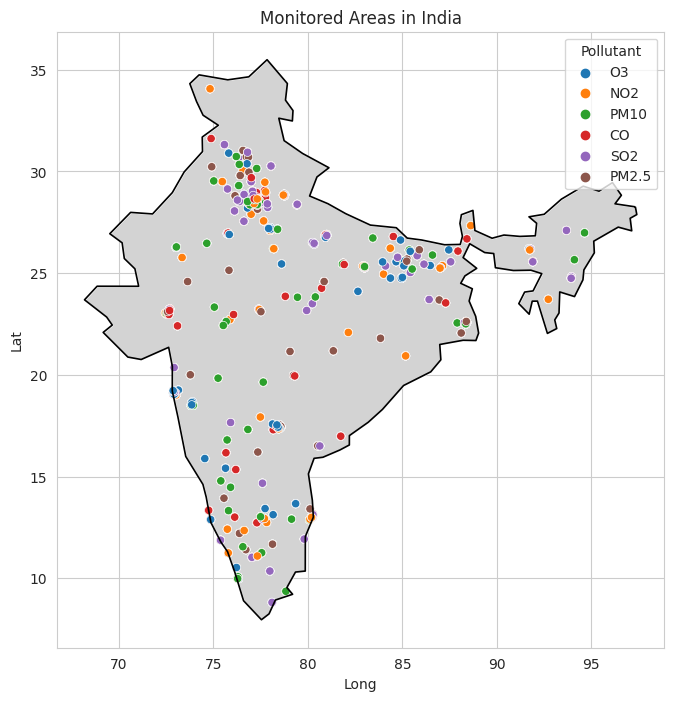

In [9]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
chosen_country = 'India'
country_geometry = world[world['name'] == chosen_country].geometry
df_chosen_country = air_quality[air_quality['Country Label'] == chosen_country]
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')

# plot the geometry of the chosen country
country_geometry.plot(ax=plt.gca(), color='lightgrey')
# create the scatterplot
sns.scatterplot(data=df_chosen_country, x='Long', y='Lat', hue='Pollutant')
# plot country borders
country_geometry.boundary.plot(ax=plt.gca(), linewidth=1.2, color='black')

plt.title(f'Monitored Areas in {chosen_country}')
plt.show()

` Hold tight! We're unmasking metric masters. Those towering bars? They signify a metrics bonanza. Our map's abuzz with their data dance. The big reveal? It's clear! The plots? Crystal clear! Let's bask in this visual feast. 📊✨
`



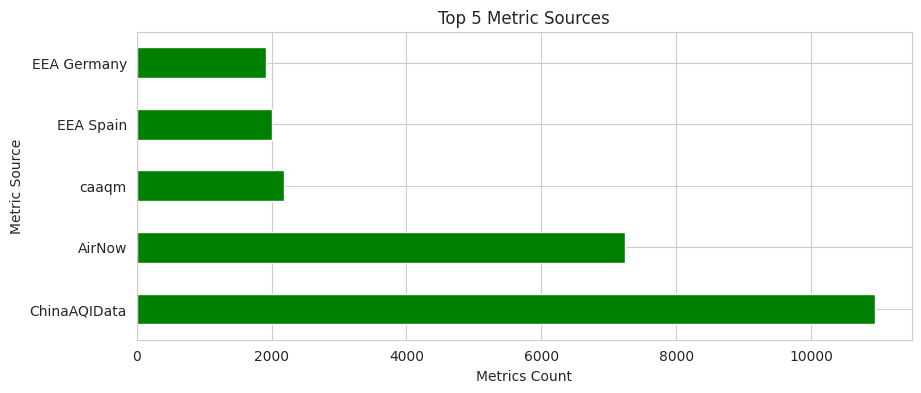

In [10]:
air_quality['Source Name'].value_counts(ascending =False).head().plot(kind='barh', figsize=(10,4), color = 'green')
plt.xlabel('Metrics Count')
plt.ylabel('Metric Source')
plt.title('Top 5 Metric Sources')
plt.show()

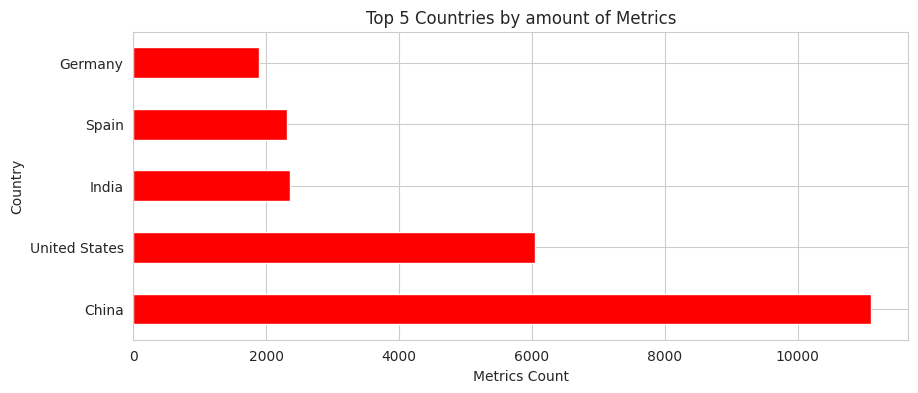

In [11]:
air_quality['Country Label'].value_counts(ascending = False).head().plot(kind='barh', figsize=(10,4), color = 'red')
plt.xlabel('Metrics Count')
plt.ylabel('Country')
plt.title('Top 5 Countries by amount of Metrics')
plt.show()

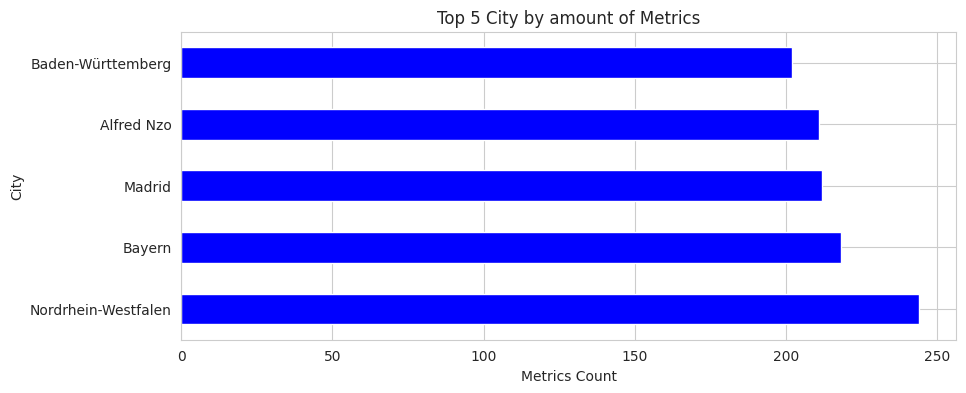

In [15]:
air_quality['City'].value_counts(ascending = False).head().plot(kind='barh', figsize=(10,4), color = 'blue')
plt.xlabel('Metrics Count')
plt.ylabel('City')
plt.title('Top 5 City by amount of Metrics')
plt.show()

***And that's a wrap! My first deep dive into ecology data - an exciting journey. If I've missed or misinterpreted anything, do share. Your feedback matters as I navigate this new realm. Cheers to your future notebooks! I'm all ears, all eyes. Let's keep the data tales spinning! 🚀🌿***